In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/experiment_metadata/atrophy_to_radiologist/correlation_to_radiologist.csv'
sheet = None

In [4]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_radiologist_controls_removed'

In [5]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
df = cal_palm.read_and_display_data()

,Method,Cerebellum_Rho,Cerebellum_P,MTL_Rho,MTL_P,Subcortex_Rho,Subcortex_P,Temporal_Rho,Temporal_P,Parietal_Rho,Parietal_P,Frontal_Rho,Frontal_P,Occipital_Rho,Occipital_P,AtrophyMethod,Smooth
0,W6_CSF,-0.11,0.4300,0.08,0.600,-0.04,0.770,0.02,0.9000,-0.03,0.840,0.04,0.771,-0.22,0.125,CSF,W Score 6mm
1,W6_Surface,0.00,0.0000,0.26,0.070,0.00,0.000,0.46,0.0010,-0.12,0.390,-0.08,0.590,0.08,0.580,Surface,W Score 6mm
2,W6_GM,-0.25,-0.0800,-0.12,0.412,-0.21,0.160,-0.21,0.1460,-0.11,0.440,-0.37,0.008,-0.19,0.196,GM,W Score 6mm
3,W6_WM,0.23,0.1200,0.08,0.600,0.08,0.580,0.02,0.8820,0.14,0.340,0.17,0.260,0.10,0.510,WM,W Score 6mm
4,Z_CSF,0.40,0.0040,0.66,0.000,0.78,0.000,0.56,0.0000,0.39,0.005,0.49,0.000,0.28,0.040,CSF,Z Score 0mm
5,Z_Surface,0.00,0.0000,0.42,0.002,0.00,0.000,0.57,0.0000,-0.06,0.655,-0.03,0.850,0.03,0.827,Surface,Z Score 0mm
6,Z_GM,-0.23,0.1100,0.25,0.810,-0.09,0.533,0.25,0.0780,-0.19,0.181,-0.14,0.321,0.21,0.143,GM,Z Score 0mm
7,Z_WM,-0.16,0.2100,0.27,0.060,0.04,0.801,0.07,0.6050,-0.16,0.262,-0.07,0.629,0.27,0.050,WM,Z Score 0mm
8,Z6_CSF,0.37,0.0007,0.78,0.000,0.77,0.000,0.52,0.0000,0.42,0.002,0.48,0.000,0.15,0.290,CSF,Z Score 6mm
9,Z6_Surface,0.00,0.0000,0.20,0.154,0.00,0.000,0.54,0.0000,-0.02,0.910,0.02,0.875,0.03,0.859,Surface,Z Score 6mm


Create Your Own Data PRN

In [4]:
import pandas as pd

data = {
    'Frontal Lobe': {'CSF': 0.07, 'Surface': 0.04, 'GM': 0.2, 'WM': 0.27, 'Radiologist': 0.22},
    'Parietal Lobe': {'CSF': 0.12, 'Surface': 0.03, 'GM': 0.16, 'WM': 0.22, 'Radiologist': 0.02},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.11, 'GM': 0.24, 'WM': 0.13, 'Radiologist': 0.22},
    'Temporal Lobe': {'CSF': 0.31, 'Surface': 0.22, 'GM': 0.26, 'WM': 0.15, 'Radiologist': 0.2},
    'Mesial Temporal Lobe': {'CSF': 0.35, 'Surface': 0.0, 'GM': 0.48, 'WM': 0.27, 'Radiologist': 0.25},
    'Cerebellum': {'CSF': 0.07, 'Surface': 0.01, 'GM': 0.21, 'WM': 0.17, 'Radiologist': -0.04},
    'Ventriculomegaly': {'CSF': 0.22, 'Surface': 0.00, 'GM': 0.05, 'WM': 0.29, 'Radiologist': 0.32},
}
df = pd.DataFrame(data)
df


,Frontal Lobe,Parietal Lobe,Occipital Lobe,Temporal Lobe,Mesial Temporal Lobe,Cerebellum,Ventriculomegaly
CSF,0.07,0.12,0.28,0.31,0.35,0.07,0.22
Surface,0.04,0.03,0.11,0.22,0.00,0.01,0.00
GM,0.20,0.16,0.24,0.26,0.48,0.21,0.05
WM,0.27,0.22,0.13,0.15,0.27,0.17,0.29
Radiologist,0.22,0.02,0.22,0.20,0.25,-0.04,0.32


In [6]:
import pandas as pd
# df = pd.read_csv(csv_path)
# df = df[df['Method'] != 'All']
df = df.loc[17:, :]
df = df.loc[:, ~df.columns.str.contains('_P')]
df

,Method,Cerebellum_Rho,MTL_Rho,Subcortex_Rho,Temporal_Rho,Parietal_Rho,Frontal_Rho,Occipital_Rho,AtrophyMethod,Smooth
17,Z0_CSF_no_ctrl,0.39,0.55,0.76,0.32,0.18,0.45,0.14,CSF,Z Score 0mm
18,Z0_Surface_no_ctrl,0.00,0.09,0.00,0.41,-0.20,-0.13,-0.04,Surface,Z Score 0mm
19,Z0_GM_no_ctrl,-0.29,0.09,-0.08,0.27,-0.15,-0.26,0.21,GM,Z Score 0mm
20,Z0_WM_no_ctrl,-0.24,0.07,-0.19,0.06,-0.19,-0.20,0.20,WM,Z Score 0mm


In [8]:
df.pop('AtrophyMethod')

17        CSF
18    Surface
19         GM
20         WM
Name: AtrophyMethod, dtype: object

Simple Bar Plot

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barplots(df, x_col, y_col, hue=None, palette="tab10"):
    ax = sns.barplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette)
    return ax 
    
def plot_point_as_diamond(df, ax, point_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    plt.scatter(x=x_coords, y=df[point_col], color='k', marker='D', facecolors='none')
    
def plot_error_bars(df, ax, err_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df[err_col], capsize=6, fmt="none", c="k")

def show_and_save_plot(out_dir=None):
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'barplot.svg'))
    plt.show()

In [ ]:
# Call the plotting functions
plt.figure(figsize=(10,6))
ax = plot_barplots(df, 'Regression Method', 'Mean')
plot_error_bars(df=df, ax=ax, err_col='Std')
plot_point_as_diamond(df=df, ax=ax, point_col='Point R-squared')
show_and_save_plot(out_dir)

Create Barplot Of Methods Within Groups
- The groups to compare within are the top level keys of the dictionary. 
- The groups to compare across are the second-level keys

In [ ]:
df

In [9]:
import pandas as pd

def melt_dataframe(df):
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=['Method'], var_name='Variable', value_name='Rho')
    
    # Extract the region names from the 'Region' column
    melted_df['Method'] = melted_df['Method'].str.split(' ', expand=True)[0]
    
    return melted_df

melted_df = melt_dataframe(df)
melted_df

,Method,Variable,Rho
0,Z0_CSF_no_ctrl,Cerebellum_Rho,0.39
1,Z0_Surface_no_ctrl,Cerebellum_Rho,0.00
2,Z0_GM_no_ctrl,Cerebellum_Rho,-0.29
3,Z0_WM_no_ctrl,Cerebellum_Rho,-0.24
4,Z0_CSF_no_ctrl,MTL_Rho,0.55
5,Z0_Surface_no_ctrl,MTL_Rho,0.09
6,Z0_GM_no_ctrl,MTL_Rho,0.09
7,Z0_WM_no_ctrl,MTL_Rho,0.07
8,Z0_CSF_no_ctrl,Subcortex_Rho,0.76
9,Z0_Surface_no_ctrl,Subcortex_Rho,0.00


In [ ]:
data_df.columns

In [ ]:
df

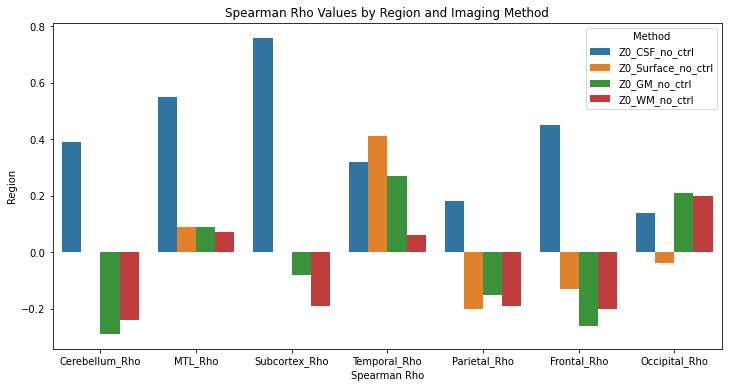

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Variable', y='Rho', hue='Method', data=melted_df)

# Customizing the plot
# plt.xlim(-0.25, 1)
plt.title('Spearman Rho Values by Region and Imaging Method')
plt.ylabel('Region')
plt.xlabel('Spearman Rho')
output_file_path = os.path.join(out_dir, 'barplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot
plt.show()

Swap Grouping

In [ ]:
df


In [ ]:
# Transpose the data to swap grouping
df = pd.DataFrame(df).T.melt(var_name='Inference', value_name='Accuracy', ignore_index=False).reset_index()

# Generate Grouped Barplot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Method', y='R-Squared', hue='Variable', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'barplot.svg')
# plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()


# Generate Boxplot

In [ ]:
# df.drop(13, inplace=True)
# df.drop(17, inplace=True)
# df.drop(14, inplace=True)


In [ ]:
melted_df

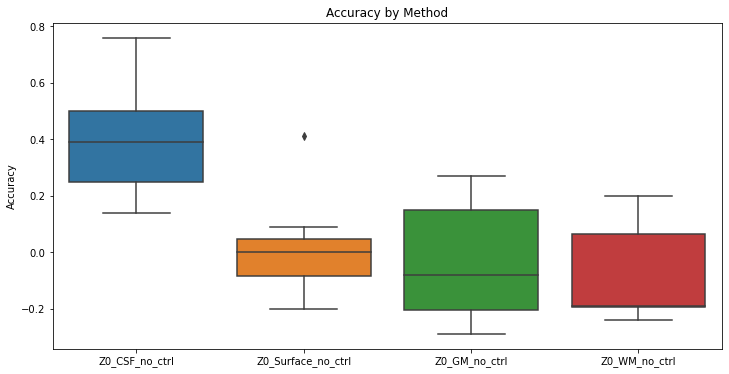

In [11]:
# df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.boxplot(x='Method', y='Rho', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Accuracy by Method')
plt.xlabel('')
plt.ylabel('Accuracy')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'boxplot_v2.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot (optional)
plt.show()

Test the Box PLot

In [12]:
melted_df.columns

Index(['Method', 'Variable', 'Rho'], dtype='object')

In [13]:
from calvin_utils.statistical_utils.kruskall_wallis import KruskalWallisTest
kwt = KruskalWallisTest(data=melted_df, value_column='Rho', group_column='Method')

Kruskal-Wallis Test Statistic: 11.8515
P-value: 0.0079
Conclusion: There is a statistically significant difference between groups.


kwt p = 0.0000

# Stacked barplot

In [ ]:
data_df.columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

def plot_stacked_barplots(df, columns, out_dir):
    # Create a DataFrame to hold the counts for each response category for each question
    response_categories = df[columns].apply(pd.Series.value_counts).fillna(0).T

    # Normalize the counts to be on a scale of 0-1
    response_categories = response_categories.div(response_categories.sum(axis=1), axis=0)
    
    # Ensure consistent coloring using tab10
    cmap = plt.get_cmap('tab10')
    unique_responses = response_categories.columns
    colors = {response: cmap(i) for i, response in enumerate(unique_responses)}

    # Plotting the stacked bar plot
    ax = response_categories.plot(kind='bar', stacked=True, figsize=(20, 20), color=[colors[response] for response in unique_responses])

    # Annotating the plot with the normalized values
    for i in range(len(response_categories)):
        cumulative_sum = np.zeros(len(response_categories.columns))
        for j, response in enumerate(response_categories.columns):
            height = response_categories.iloc[i, j]
            cumulative_sum[j] = cumulative_sum[j-1] + height if j > 0 else height
            ax.text(i, cumulative_sum[j] - height / 2, f'{height:.2f}', ha='center', va='center', fontsize=12, color='black')

    # Customizing the plot
    plt.title('Normalized Stacked Bar Plot of Responses', fontsize=20)
    plt.ylabel('Proportion of Responses', fontsize=16)
    plt.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
    plt.xticks(range(len(columns)), [col.replace('_', ' ') for col in columns], rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    sns.despine()
    plt.tight_layout()
    
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'stacked_barplot.svg'))
    
    plt.show()

In [ ]:
# Likert Questions:
# columns_to_plot = [
#     'How_intuitive_was_the_software_assessment_compared_to_the_paper_test_',
#     'How_comfortable_were_you_navigating_through_the_software_',
#     'How_confident_do_you_feel_being_able_to_complete_the_test_on_your_own_',
#     'How_much_additional_value_do_you_see_this_assessment_bringing_to_your_medical_care_'
# ]
# Yes/No Questions:
columns_to_plot = [
    'Would_you_find_it_useful_if_you_could_take_the_test_before_your_appointment_and_talk_about_the_results_with_your_doctor_',
       'Would_you_recommend_this_assessment_to_someone_else_',
       'Would_being_able_to_take_this_test_remotely_help_your_care_',
       'Would_taking_this_test_alone_alleviate_the_stress_of_being_assessed_by_a_doctor_',
       'Would_taking_this_test_alone_alleviate_feelings_of_judgement_during_a_test_',
        'Would_you_trust_the_results_of_this_test_'
]
# Assuming 'df' is your DataFrame
plot_stacked_barplots(data_df, columns_to_plot, out_dir)


# 05 - Scatterplot a Value to a Classification